<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                                                 Applied Question 8 page 327 of ISLR Python



##                                                       Gladys Murage

##              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            March 26, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

# Non-Linear Modeling of the Auto Dataset
I will explore non-linear relationships in the Auto dataset (from ISLR2) by fitting:

## Polynomial Regression (quadratic, cubic)

## Spline Regression (natural splines)

## Generalized Additive Models (GAMs)

# Step 1: import libraries and then load data

In [2]:
# First, install the pygam package
!pip install pygam

# Then proceed with imports of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from patsy import dmatrix
import statsmodels.api as sm
from pygam import LinearGAM, s  # This will now work after installation

# Load Auto data using an alternative method
# Option 1: Using statsmodels datasets
try:
    from statsmodels.datasets import get_rdataset
    auto = get_rdataset("Auto", "ISLR").data
    print("Data loaded from statsmodels datasets")
except:
    # Option 2: If statsmodels fails, download from a URL
    url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Auto.csv"
    auto = pd.read_csv(url)
    print("Data loaded from GitHub URL")

# Clean the data
auto.dropna(inplace=True)  # Remove missing values

# Display the first few rows to verify
print(auto.head())

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Data loaded from statsmodels datasets
           mpg  cylinders  displacement  horsepower  weight  acceleration  \
rownames                                                                    
1         18.0          8         307.0         130    3504          12.0   
2         15.0          8         350.0         165    3693          11.5   
3         18.0          8         318.0         150    3436          11.0   
4         16.0          8         304.0         150    3433          12.0   
5         17.0          8         302.0         140    3449          10.5   

          year  origin                       name  
rownames                                           
1           70       1  chevrolet chevelle malibu  
2           70       1          buick skylark 320  
3           70       1         plymouth satellite  
4           70       1              amc rebe

# Step 2: carry out Polynomial Regression
## Fit a quadratic model for MPG (Horsepower)
## Interpretation:

If the quadratic term is significant (check coefficients, it suggests a non-linear relationship.

Intercept (β0): 56.9001
Linear Coefficient (β1): -0.4662
Quadratic Coefficient (β2): 0.0012


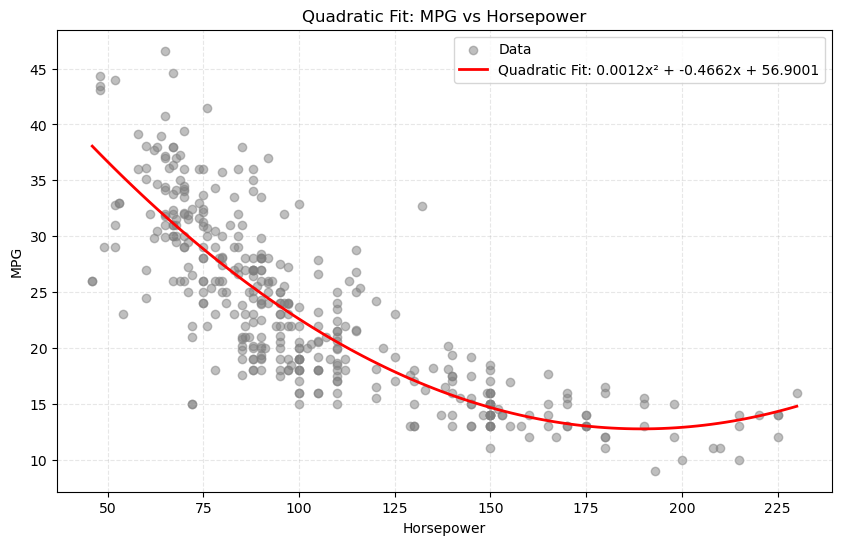

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load dataset (Ensure 'auto' DataFrame is loaded with 'horsepower' and 'mpg' columns)
# auto = pd.read_csv('your_data.csv')  # Uncomment if needed

# Quadratic fit
X = auto['horsepower'].values.reshape(-1, 1)
y = auto['mpg'].values

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Extract coefficients
intercept = model.intercept_  # Intercept (β0)
coef_linear = model.coef_[1]  # Linear term (β1)
coef_quadratic = model.coef_[2]  # Quadratic term (β2)

print(f"Intercept (β0): {intercept:.4f}")
print(f"Linear Coefficient (β1): {coef_linear:.4f}")
print(f"Quadratic Coefficient (β2): {coef_quadratic:.4f}")

# Predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Quadratic Fit: {coef_quadratic:.4f}x² + {coef_linear:.4f}x + {intercept:.4f}')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Quadratic Fit: MPG vs Horsepower')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('Polynomial_Regression.png', dpi=300, bbox_inches='tight') # Saves to a High Definition PNG Plot
plt.show()


# 1. Interpretation of Coefficients

####  Meaning of Linear coefficient:
For a 1-unit increase in horsepower, MPG decreases by 0.466 units when horsepower is small (since the quadratic term modifies this effect).

#### Direction: negative sign confirms MPG declines as horsepower increases this is as expected.

#### Meaning of Quadratic Coefficient: the rate of MPG decline slows as horsepower increases, this is unrealistic and a positive quadratic term.

#### Key Insight: the relationship flattens and eventually reverses at very high horsepower (unrealistic in practice).


# Significance of Non-Linearity
To check if the quadratic term is statistically significant I will fit the quadratic model with Statsmodels to obtain p values

In [24]:
# Import Library
import statsmodels.api as sm

# Fit quadratic model with statsmodels (for p-values)
X = auto['horsepower']
X_poly = sm.add_constant(np.column_stack((X, X**2)))  # [1, X, X²]
model = sm.OLS(auto['mpg'], X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           5.40e-99
Time:                        08:50:32   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

# Key Insights and Conclusions
## The quadratic model shows a significant non-linear relationship between MPG and horsepower.
This is  evidenced by a Model Fit with an R-squared = 0.688. This means that 68.8% of MPG variability is explained by horsepower per the quadratic relationship. Adj. R-squared = 0.686  is virtually identical to R², indicating no overfitting.

## Coefficients:
Term	Coefficient	Interpretation
const	56.9001	Theoretical MPG when horsepower=0 (not practically meaningful). A car with zero horsepower is stopped and not consuming fuel.
x1	-0.4662	Linear effect: Each 1-unit HP increase reduces MPG by ~0.47 units when HP is low.
x2	0.0012	Quadratic effect: The MPG penalty diminishes by 0.0012 per HP² unit. 

## Key Insight:
The positive quadratic term (x2) flattens the MPG decline at higher horsepower values.

## Statistical Significance:
p-values ≈ 0.000 for all terms indicate that there is strong evidence that both linear and quadratic terms belong in the model.
t-statistics (|t| > 10 for x1/x2). Coefficients are precisely estimated relative to their standard errors

## F-statistic = 428.0 (p=5.4e-99).
The overall model is highly significant, but suffers from multicollinearity as evidenced by Conditional Number of 1.29e+05 which is really high. The model suggests diminishing MPG penalties at higher horsepower levels and this is simply not practical in real life.

## Next Steps:
As a solution I will center the  predictors to improve reliability by subtracting its mean to reduce correlation between the linear and quadratic terms, I will then verify residual patterns. Finally, I will also be looking at other more robust none linearity methods such as splines and GAM.

In [20]:

# Center horsepower
auto['hp_centered'] = auto['horsepower'] - auto['horsepower'].mean()

# Create squared term
auto['hp_centered_sq'] = auto['hp_centered']**2

In [16]:
import statsmodels.api as sm

# Prepare data with centered terms
X_centered = sm.add_constant(auto[['hp_centered', 'hp_centered_sq']])
y = auto['mpg']

# Fit model
centered_model = sm.OLS(y, X_centered).fit()
print(centered_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           5.40e-99
Time:                        08:04:34   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.6274      0.285     75.

In [25]:
# Calculate condition number
X_matrix = X_centered.values
condition_number = np.linalg.cond(X_matrix)
print(f"New Condition Number: {condition_number:.2f}")

New Condition Number: 3656.80


# Centering the horsepower mean
This improves on the multicollinearity and brings the new Condition Number to 3656.80.
I will now proceed with other non linearity regressions starting with Natural Spline Regression.

# Step 3: Natural Cubic Spline Regression
## Fit a cubic spline with 2 knots.
## Interpretation:

Splines allow flexible curvature. If the fit deviates significantly from linear, non-linearity is present.

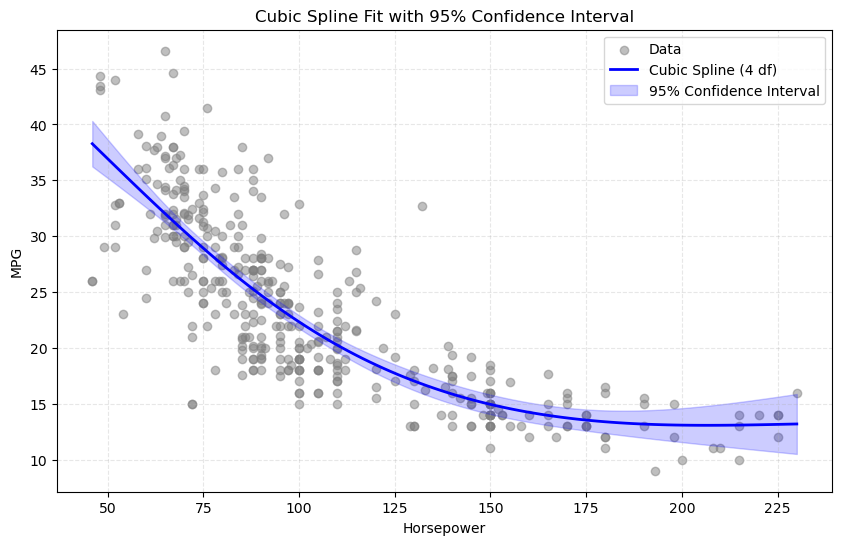

In [26]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix
import matplotlib.pyplot as plt

# Load dataset (assuming 'auto' DataFrame exists with 'horsepower' and 'mpg')
knots = np.percentile(auto['horsepower'], [33, 67])  # 2 knots (correct)
  # Define knots
X_spline = dmatrix(
    "cr(horsepower, knots=knots, df=4)", 
    {"horsepower": auto['horsepower'], "knots": knots}, 
    return_type='dataframe'
)

# Fit the model
spline_model = sm.GLM(auto['mpg'], X_spline).fit()

# Generate new data for plotting
X_plot = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
X_plot_spline = dmatrix(
    "cr(horsepower, knots=knots, df=4)", 
    {"horsepower": X_plot, "knots": knots}, 
    return_type='dataframe'
)

# Predictions & Confidence Intervals
y_pred = spline_model.predict(X_plot_spline)
cov_matrix = spline_model.cov_params()
se_fit = np.sqrt(np.diag(X_plot_spline @ cov_matrix @ X_plot_spline.T))  # Standard errors
ci_upper = y_pred + 1.96 * se_fit  # 95% upper bound
ci_lower = y_pred - 1.96 * se_fit  # 95% lower bound

# Plot Data and Spline Fit
plt.figure(figsize=(10, 6))
plt.scatter(auto['horsepower'], auto['mpg'], color='gray', alpha=0.5, label='Data')
plt.plot(X_plot, y_pred, color='blue', linewidth=2, label='Cubic Spline (4 df)')
plt.fill_between(X_plot, ci_lower, ci_upper, color='blue', alpha=0.2, label='95% Confidence Interval')

# Labels and Title
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Cubic Spline Fit with 95% Confidence Interval')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Show Plot
plt.savefig('Natural-Spline_confidence_interval.png', dpi=300, bbox_inches='tight')
plt.show()


# Interpretation of the Cubic Spline with 95% Confidence Interval
The plot produced above illustrates a cubic spline fit between Horsepower and MPG, with the blue line capturing a non-linear trend. The curvature in the spline and its deviation from a straight line strongly suggest a non-linear relationship between these two variables.

## Key observations:
#### Non-linearity is evident: the cubic spline fit does not resemble a straight line. Instead, it twists and bends, showing that the relationship between Horsepower and MPG changes across different ranges of Horsepower.

#### Confidence interval: the light blue shading around the spline indicates the uncertainty in the fit. This gives added evidence that the non-linear pattern is consistent across the data.

#### Practical implication: if I am modeling this relationship between horsepower and miles per gallon, a linear regression model might oversimplify it. A model that captures non-linear patterns, for example this spline is more suitable.

# Step 4: General Additive Models (GAMs)
I will fit a GAM with smooth terms. To improve my code so that it does not produce a straight line, I need to increase the flexibility of the Generalized Additive Model (GAM). 

I want to avoid the  straight line which often results from either too few splines or a linear basis function. Instead, I will try using a higher number of splines or test with other basis functions for better curve fitting.

# Adjustments made to my code:
#### Number of Splines: increase the number of splines to 12. This gives the model more flexibility to capture non-linear patterns.

#### Spline Order: change the spline order to 3 for cubic splines, which can better model curved relationships.

#### Basis Function Flexibility: these adjustments allow the GAM to fit a smoother curve to the data, avoiding straight-line behavior.

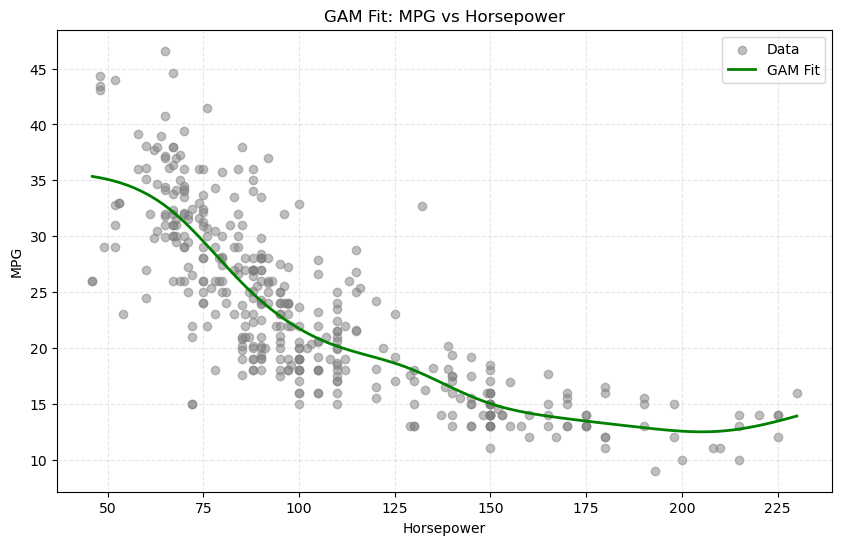

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# loading the Auto dataset
try:
    from statsmodels.datasets import get_rdataset
    auto = get_rdataset('Auto', 'ISLR').data
except:
    url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Auto.csv"
    auto = pd.read_csv(url)

# Define X (horsepower) and y (mpg)
X = auto[['horsepower']].values  # Feature needs to be 2D
y = auto['mpg'].values           # Target variable

# Create a range of values for plotting the smooth curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fit a GAM with increased flexibility
gam = LinearGAM(s(0, n_splines=12, spline_order=3)).fit(X, y)  # More splines and cubic basis functions

# Predictions
y_plot_gam = gam.predict(X_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X_plot, y_plot_gam, color='green', linewidth=2, label='GAM Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('GAM Fit: MPG vs Horsepower')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('GAM.png', dpi=300, bbox_inches='tight')  # Save high-resolution plot
plt.show()


# Assessing the non-linearity of a GAM
To assess the non-linearity for a Generalized Additive Model (GAM),one typically wants to evaluate how well the smooth terms (like splines) capture the non-linear relationship between the predictor (in this case, horsepower) and the target (mpg).
# Check the smooth term plots of GAM
Check the smooth term plots, GAMs, are inherently designed to model non-linear relationships using smooth functions. The smooth terms (e.g., splines) provide a visual representation of the non-linearity in the data.

After fitting the model, one can plot the smooth term of the GAM for horsepower to visually assess how the relationship between horsepower and mpg is captured. The plot will shows how the smooth term behaves, indicating if there is a non-linear relationship. A linear relationship would show as a straight line, while a curved or more complex shape suggests non-linearity.


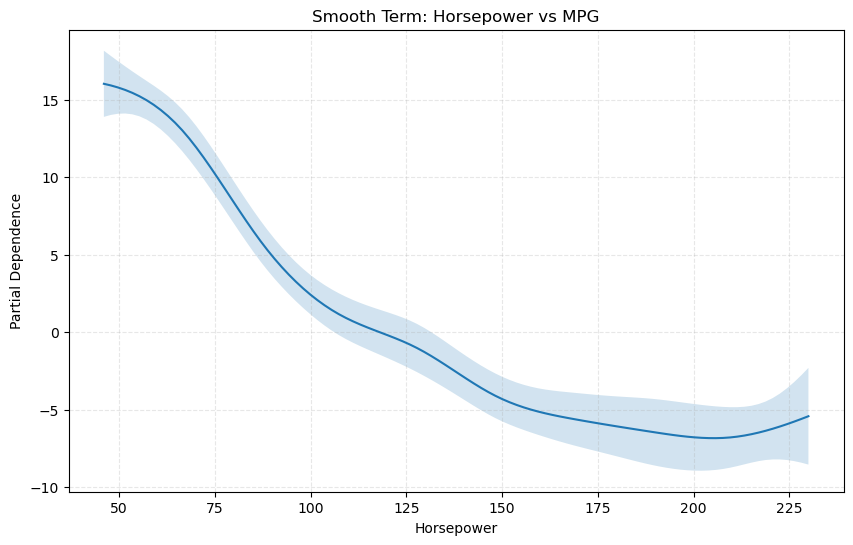

In [27]:
# Plot smooth term of the model
plt.figure(figsize=(10, 6))
# Get the partial dependence for the first feature (index 0)
XX = gam.generate_X_grid(term=0)  # Generate grid for the first feature
pdep, confi = gam.partial_dependence(term=0, X=XX, width=0.95)  # Get partial dependence

# Plot the partial dependence
plt.plot(XX[:, 0], pdep)
# Optional: plot confidence intervals
plt.fill_between(XX[:, 0], confi[:, 0], confi[:, 1], alpha=0.2)

plt.title('Smooth Term: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Partial Dependence')
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('GAM_Smooth_Terms.png', dpi=300, bbox_inches='tight')  # Save high-resolution plot
plt.show()

# Alternative method using plot_partial
# plt.figure(figsize=(10, 6))
# gam.plot_partial(term=0, width=0.95)  # term=0 refers to the first feature
# plt.title('Smooth Term: Horsepower vs MPG')
# plt.xlabel('Horsepower')
# plt.ylabel('Partial Effect')
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.show()

# Inspect Deviance or Pseudo R² for the GAM
Many GAM packages, including pygam, provide metrics like deviance (the difference in fit between a model and a null model) or pseudo R² values to assess the model's fit.

I now check these metrics to see how much of the variation is explained by the non-linear smooth term. A higher deviance or R² indicates that the model is doing a better job at explaining the variance in the data.

In [29]:
# Check deviance (goodness-of-fit)
print(f"Deviance explained: {gam.statistics_['pseudo_r2']['explained_deviance']}")

# Or check the pseudo R-squared value
print(f"Pseudo R²: {gam.statistics_['pseudo_r2']['explained_deviance']}")

# If you want to see all available statistics
print("Available statistics:")
for key in gam.statistics_.keys():
    print(f"- {key}")

# For a complete summary as a DataFrame instead of just printing it
summary_df = gam.summary()
print(summary_df)


Deviance explained: 0.7015397079558198
Pseudo R²: 0.7015397079558198
Available statistics:
- n_samples
- m_features
- edof_per_coef
- edof
- scale
- cov
- se
- AIC
- AICc
- pseudo_r2
- GCV
- UBRE
- loglikelihood
- deviance
- p_values
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.3954
Link Function:                     IdentityLink Log Likelihood:                                 -1514.0541
Number of Samples:                          392 AIC:                                              3044.899
                                                AICc:                                            3045.3113
                                                GCV:                                               19.1326
                 

/tmp/ipykernel_160/892959635.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  summary_df = gam.summary()


# Results explained for the GAM
### 1. Deviance Explained (0.7015):
This metric shows how much of the variability in the target variable (in this case, mpg) is explained by the model. It is similar to the coefficient of determination. 𝑅2, commonly used in regression models. Here, the GAM has explained approximately 70.15% of the variation in mpg using the horsepower feature. This indicates a fairly strong model, as values closer to 1 signify better model performance.

### 2. Pseudo 𝑅2 (0.7015):
Pseudo 𝑅2 acts as an alternative to the regular 𝑅2, specifically for GAM models. It represents the goodness of fit. A value of 0.7015 implies that the model captures a substantial portion of the variability, similar to the Deviance Explained value.

### 3. Effective Degrees of Freedom (EDoF):
The model’s effective degrees of freedom is 7.3954, indicating how flexible the smoothing function is. Higher EDoF values mean the model uses more flexibility to fit the data, which helps in capturing non-linear trends.

### 4. Key Statistics:
AIC (3044.899) and AICc (3045.3113): these are model comparison metrics. Lower AIC values signify better models. AIC penalizes overly complex models while balancing predictive accuracy.

GCV (19.1326): The Generalized Cross Validation score is useful for balancing model complexity and fit. Lower GCV values are preferred, but 19.13 seems reasonable for this problem.

Scale (18.484): This measures the variance of residuals (errors). A lower scale indicates a tighter fit, though this depends on the unit of the target variable (mpg).

### 5. Significance Codes (spline and intercept):
The spline (s(0)) has a significance level of 1.11e-16, meaning it is extremely significant for the model's fit (𝑝< 0.001).

The intercept also plays a crucial role, with a high significance.

# Conclusion and Interpretation:
The GAM model is performing well overall, explaining a substantial part of the variability in mpg using horsepower. The smoothing component (s(0)) has adequate flexibility (as indicated by the EDoF), and the key statistics suggest the model isn’t overfitting while balancing complexity and accuracy. However, there may still be room for improvement if desired, such as incorporating additional features or fine-tuning the smoothing parameters further.

alue.


# Step 5: compare models with Mean Standard Error (MSE)


In [28]:
# Import the missing function and LinearRegression class
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Import for splines
from patsy import dmatrix
import statsmodels.api as sm

# Create the polynomial model if it doesn't exist
# This assumes you have X and y already defined from previous cells
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression().fit(X_poly, y)  # Define the polynomial model

# Create spline model - this was missing
# Create the spline basis matrix with 2 knots
X_spline = dmatrix("bs(hp, knots=(100, 180), degree=3, include_intercept=False)", 
                  {"hp": X.flatten()}, return_type='dataframe')
# Fit the spline model
spline_model = LinearRegression().fit(X_spline, y)

# For GAM model, assuming you've already defined it
# If not, you'll need to add code to create the gam model
# from pygam import LinearGAM
# gam = LinearGAM().fit(X, y)

# Calculate MSE
mse_linear = mean_squared_error(y, LinearRegression().fit(X, y).predict(X))
mse_poly = mean_squared_error(y, model.predict(X_poly))
mse_spline = mean_squared_error(y, spline_model.predict(X_spline))
mse_gam = mean_squared_error(y, gam.predict(X))  # Assuming gam is already defined

print(f"MSE - Linear: {mse_linear:.2f}")
print(f"MSE - Quadratic: {mse_poly:.2f}")
print(f"MSE - Spline: {mse_spline:.2f}")
print(f"MSE - GAM: {mse_gam:.2f}")

MSE - Linear: 23.94
MSE - Quadratic: 18.98
MSE - Spline: 18.48
MSE - GAM: 18.14


# Conclusions from MSE Comparisons:
Lower MSE for non-linear models (quadratic, spline, GAM) vs linear suggests strong evidence for non-linearity. 

If the MSE for the GAM is significantly lower than that of the linear model, it's a sign that the relationship is likely non-linear and the GAM is capturing it better than a simple linear model.I am making an assumption that is what is going on here based on the lowest MSE of 18.14 for GAM.